In [1]:
import numpy as np

import sys

sys.path.append('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from elements import *

import measurement as me

<IPython.core.display.Javascript object>


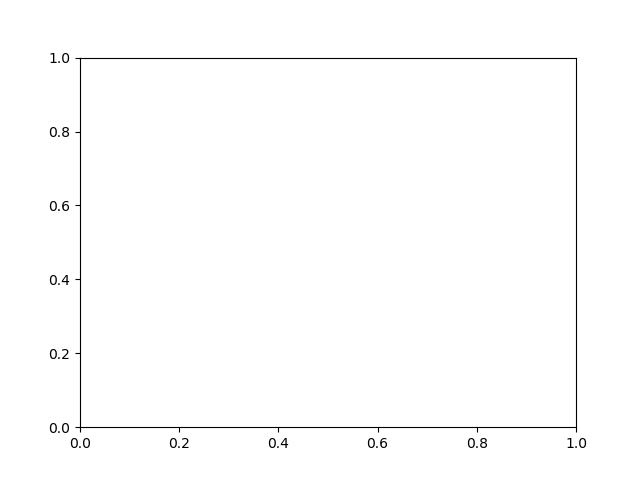

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Define optomechanical system

In [5]:
from ipywidgets import interactive
def change_detuning(val = 0.2, power = -140):
    omega_c = 5e9*np.pi*2

    kappa_0 = 0.3e6*np.pi*2
    kappa_ex = 0.4e6*np.pi*2

    kappa = kappa_0 + kappa_ex

    omega_m = 5e6*np.pi*2
    gamma_m = 100*np.pi*2

    P_in = 10**(power/10.)

    g_0 = 200*np.pi*2

    omega_drive = omega_c + val* omega_m


    from DCnonlinearities import optomechanics

    omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_c, omega_drive, omega_m, g_0)

    g= omdir['g']
    omega_c = omdir['omega_c']

    print ('val_actual: ',(omega_drive - omega_c)/omega_m)


    a = Mode('a', omega_c)
    b = Mode('b', omega_m)

    a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_drive, bath_temp=10e-3)
    a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)

    b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

    g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

    sys_om = System([a, b], [a_in0,b_in0 , a_inex], [g_ab])

    C = 4 * g**2/kappa/gamma_m

    print ('Cooperativity C: ',C)

    a_outex = Output(sys_om, a_inex)

    omegas = np.linspace(omega_drive + omega_m - gamma_m*100, omega_drive + omega_m + gamma_m*100, 10001)
    plt.figure('spec_b')
    spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components = True, plot = True)
    plt.figure('spec_r')
    omegas = np.linspace(omega_drive - omega_m - gamma_m*100, omega_drive - omega_m + gamma_m*100, 10001)

    spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components = True, plot = True)
    
interactive_plot = interactive(change_detuning, val = (-1., 1.), power = (-150.,-120.))

interactive_plot

interactive(children=(FloatSlider(value=0.2, description='val', max=1.0, min=-1.0), FloatSlider(value=-140.0, …

## Measurement 1: Mechanical Sidebands

<IPython.core.display.Javascript object>


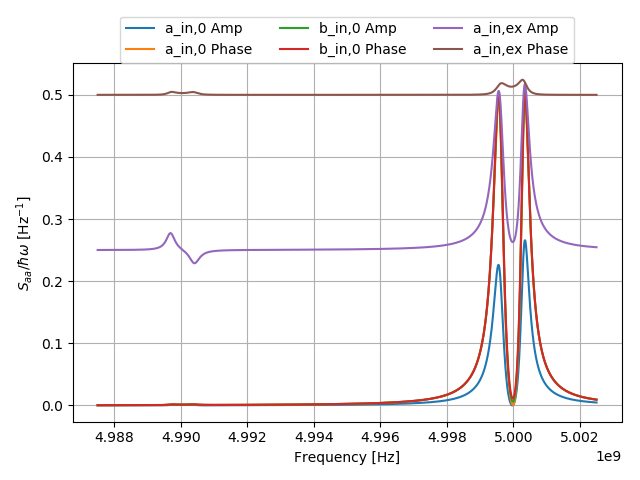

In [24]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_drive - 1.5*omega_m, omega_drive + 1.5*omega_m, 10001)

spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components = True, plot = True)

## Measurement 2: Red sideband

<IPython.core.display.Javascript object>


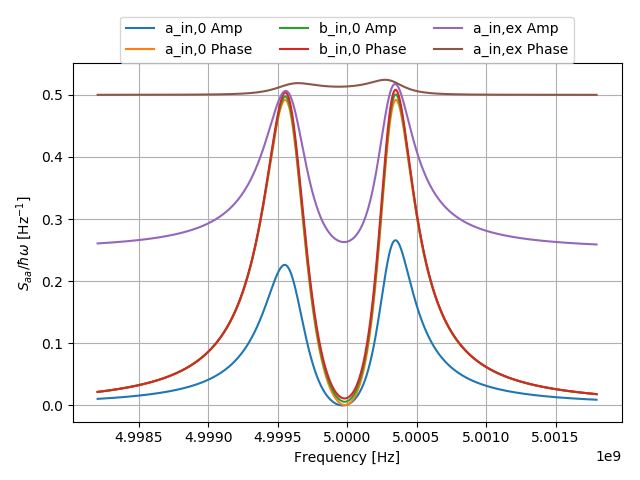

In [25]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_drive + 1.*omega_m - C*2*gamma_m, omega_drive + 1.*omega_m + C*2*gamma_m, 10001)




spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components=True, plot = True)

### Linear Response

<IPython.core.display.Javascript object>


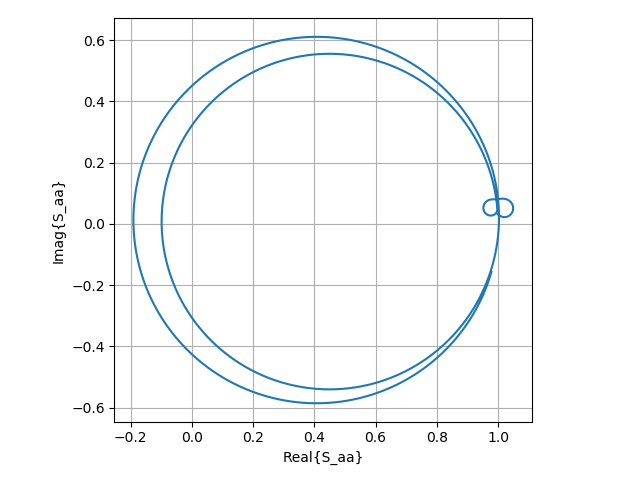

<IPython.core.display.Javascript object>


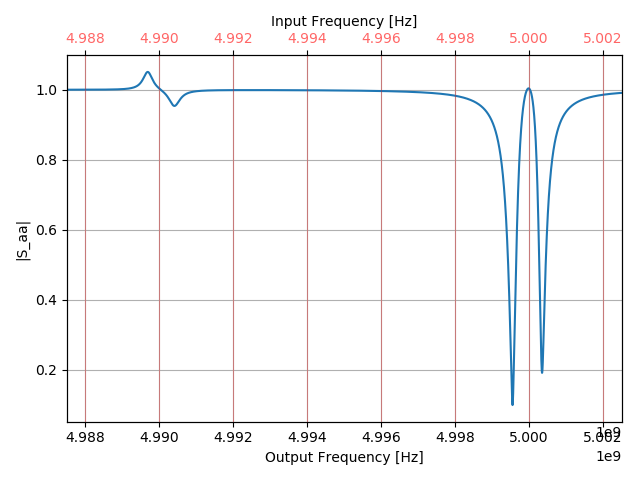

<IPython.core.display.Javascript object>


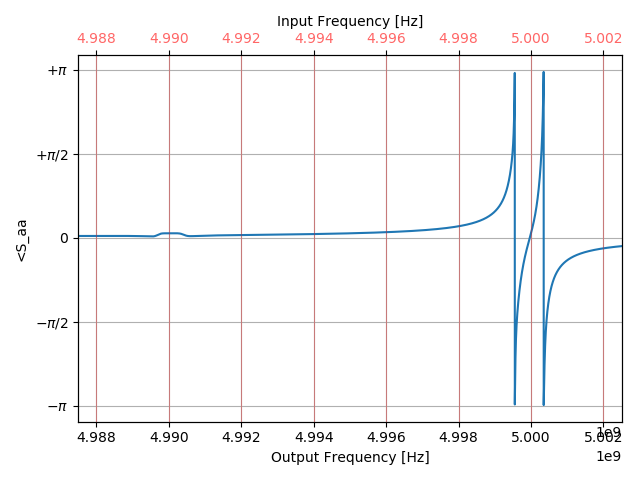

In [26]:
omegas = np.linspace(omega_drive - 1.5*omega_m, omega_drive + 1.5*omega_m, 10001)
omegas_new, A = me.linear_response(Input = a_inex, output = a_outex, Omegas=omegas, system=sys_om, plot =1)